# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Short-study-of-the-Lempel-Ziv-complexity" data-toc-modified-id="Short-study-of-the-Lempel-Ziv-complexity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Short study of the Lempel-Ziv complexity</a></div><div class="lev2 toc-item"><a href="#Short-definition" data-toc-modified-id="Short-definition-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Short definition</a></div><div class="lev2 toc-item"><a href="#Python-implementation" data-toc-modified-id="Python-implementation-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Python implementation</a></div><div class="lev2 toc-item"><a href="#Tests-(1/2)" data-toc-modified-id="Tests-(1/2)-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tests (1/2)</a></div><div class="lev2 toc-item"><a href="#Cython-implementation" data-toc-modified-id="Cython-implementation-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cython implementation</a></div><div class="lev2 toc-item"><a href="#Numba-implementation" data-toc-modified-id="Numba-implementation-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Numba implementation</a></div><div class="lev2 toc-item"><a href="#Tests-(2/2)" data-toc-modified-id="Tests-(2/2)-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Tests (2/2)</a></div><div class="lev2 toc-item"><a href="#Benchmarks" data-toc-modified-id="Benchmarks-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Benchmarks</a></div><div class="lev2 toc-item"><a href="#Complexity-?" data-toc-modified-id="Complexity-?-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Complexity ?</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev2 toc-item"><a href="#(Experimental)-Julia-implementation" data-toc-modified-id="(Experimental)-Julia-implementation-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>(Experimental) <a href="http://julialang.org" target="_blank">Julia</a> implementation</a></div><div class="lev2 toc-item"><a href="#Ending-notes" data-toc-modified-id="Ending-notes-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Ending notes</a></div>

# Short study of the Lempel-Ziv complexity

In this short [Jupyter notebook](https://www.Jupyter.org/) aims at defining and explaining the [Lempel-Ziv complexity](https://en.wikipedia.org/wiki/Lempel-Ziv_complexity).

[I](http://perso.crans.org/besson/) will give examples, and benchmarks of different implementations.

- **Reference:** Abraham Lempel and Jacob Ziv, *« On the Complexity of Finite Sequences »*, IEEE Trans. on Information Theory, January 1976, p. 75–81, vol. 22, n°1.

----
## Short definition
The Lempel-Ziv complexity is defined as the number of different substrings encountered as the stream is viewed from begining to the end.

As an example:

```python
>>> s = '1001111011000010'
>>> lempel_ziv_complexity(s)  # 1 / 0 / 01 / 11 / 10 / 110 / 00 / 010
8
```

Marking in the different substrings, this sequence $s$ has complexity $\mathrm{Lempel}$-$\mathrm{Ziv}(s) = 6$ because $s = 1001111011000010 = 1 / 0 / 01 / 11 / 10 / 110 / 00 / 010$.

- See the page https://en.wikipedia.org/wiki/Lempel-Ziv_complexity for more details.

Other examples:

```python
>>> lempel_ziv_complexity('1010101010101010')  # 1, 0, 10, 101, 01, 010, 1010
7
>>> lempel_ziv_complexity('1001111011000010000010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000
9
>>> lempel_ziv_complexity('100111101100001000001010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000, 0101
10
```

----
## Python implementation

In [112]:
def lempel_ziv_complexity(sequence):
    """Lempel-Ziv complexity for a binary sequence, in simple Python code."""
    sub_strings = set()
    n = len(sequence)
    ind = 0
    inc = 1
    # this while loop runs at most n times
    while True:
        if ind + inc > len(sequence):
            break
        # this can take some time, takes O(inc)
        sub_str = sequence[ind : ind + inc]
        # and this also, takes a O(log |size set|) in worst case
        # max value for inc = n / size set at the end
        # so worst case is that the set contains sub strings of the same size
        # and the worst loop takes a O(n / |S| * log(|S|))
        # ==> so if n/|S| is constant, it gives O(n log(n)) at the end
        # but if n/|S| = O(n) then it gives O(n^2)
        if sub_str in sub_strings:
            inc += 1
        else:
            sub_strings.add(sub_str)
            ind += inc
            inc = 1
    return len(sub_strings)

----
## Tests (1/2)

In [4]:
s = '1001111011000010'
lempel_ziv_complexity(s)  # 1 / 0 / 01 / 11 / 10 / 110 / 00 / 010

8

In [5]:
%timeit lempel_ziv_complexity(s)

6.47 µs ± 891 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
lempel_ziv_complexity('1010101010101010')  # 1, 0, 10, 101, 01, 010, 1010

7

In [7]:
lempel_ziv_complexity('1001111011000010000010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000

9

In [8]:
lempel_ziv_complexity('100111101100001000001010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000, 0101

10

In [9]:
%timeit lempel_ziv_complexity('100111101100001000001010')

8.82 µs ± 795 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
import random

def random_string(size, alphabet="ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    return "".join(random.choices(alphabet, k=size))

def random_binary_sequence(size):
    return random_string(size, alphabet="01")

In [13]:
random_string(100)
random_binary_sequence(100)

'JYLRJBDBFGTBMLFKNYQMJXIZJKKEVONGVKUCHNSSJCYROTATJDACWKCLWDEULMZWSQHJFFCQGMRCINHRIOLMEWWEPTOUUECJWAAN'

'1110000010101011101000110010001100000011101110011010100101100110100010110110111000111000101100001010'

In [43]:
for (r, name) in zip(
    [random_string, random_binary_sequence],
    ["random strings in A..Z", "random binary sequences"]
    ):
    print("\nFor {}...".format(name))
    for n in [10, 100, 1000, 10000, 100000]:
        print("  of sizes {}, Lempel-Ziv complexity runs in:".format(n))
        %timeit lempel_ziv_complexity(r(n))


For random strings in A..Z...
  of sizes 10, Lempel-Ziv complexity runs in:
7.64 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
  of sizes 100, Lempel-Ziv complexity runs in:
49.6 µs ± 6.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
  of sizes 1000, Lempel-Ziv complexity runs in:
591 µs ± 78.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
  of sizes 10000, Lempel-Ziv complexity runs in:
5.2 ms ± 770 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
  of sizes 100000, Lempel-Ziv complexity runs in:
52.2 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

For random binary sequences...
  of sizes 10, Lempel-Ziv complexity runs in:
6.04 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
  of sizes 100, Lempel-Ziv complexity runs in:
46.8 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
  of sizes 1000, Lempel-Ziv complexity runs in:
491 µs ± 57.2 µs per loop (mean ± std. dev. of 

We can start to see that the time complexity of this function seems to grow linearly as the size grows.

----
## Cython implementation
As [this blog post](https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/) explains it, we can easily try to use [Cython](http://Cython.org/) in a notebook cell.

> See [the Cython documentation](http://docs.cython.org/en/latest/src/quickstart/build.html#using-the-jupyter-notebook) for more information.

In [16]:
%load_ext cython

In [45]:
%%cython
import cython

ctypedef unsigned int DTYPE_t

@cython.boundscheck(False) # turn off bounds-checking for entire function, quicker but less safe
def lempel_ziv_complexity_cython(str sequence not None):
    """Lempel-Ziv complexity for a string, in simple Cython code (C extension)."""
    
    cdef set sub_strings = set()
    cdef str sub_str = ""
    cdef DTYPE_t n = len(sequence)
    cdef DTYPE_t ind = 0
    cdef DTYPE_t inc = 1
    while True:
        if ind + inc > len(sequence):
            break
        sub_str = sequence[ind : ind + inc]
        if sub_str in sub_strings:
            inc += 1
        else:
            sub_strings.add(sub_str)
            ind += inc
            inc = 1
    return len(sub_strings)

Let try it!

In [37]:
s = '1001111011000010'
lempel_ziv_complexity_cython(s)  # 1 / 0 / 01 / 11 / 10 / 110 / 00 / 010

8

In [29]:
%timeit lempel_ziv_complexity(s)
%timeit lempel_ziv_complexity_cython(s)

4.97 µs ± 590 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
843 ns ± 38.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
lempel_ziv_complexity_cython('1010101010101010')  # 1, 0, 10, 101, 01, 010, 1010

7

In [31]:
lempel_ziv_complexity_cython('1001111011000010000010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000

9

In [32]:
lempel_ziv_complexity_cython('100111101100001000001010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000, 0101

10

Now for a test of the speed?

In [46]:
for (r, name) in zip(
    [random_string, random_binary_sequence],
    ["random strings in A..Z", "random binary sequences"]
    ):
    print("\nFor {}...".format(name))
    for n in [10, 100, 1000, 10000, 100000]:
        print("  of sizes {}, Lempel-Ziv complexity in Cython runs in:".format(n))
        %timeit lempel_ziv_complexity_cython(r(n))


For random strings in A..Z...
  of sizes 10, Lempel-Ziv complexity in Cython runs in:
3.9 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
  of sizes 100, Lempel-Ziv complexity in Cython runs in:
25.8 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
  of sizes 1000, Lempel-Ziv complexity in Cython runs in:
276 µs ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
  of sizes 10000, Lempel-Ziv complexity in Cython runs in:
2.43 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
  of sizes 100000, Lempel-Ziv complexity in Cython runs in:
28 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

For random binary sequences...
  of sizes 10, Lempel-Ziv complexity in Cython runs in:
4.06 µs ± 444 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
  of sizes 100, Lempel-Ziv complexity in Cython runs in:
29 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
  of sizes 1000, Lempel-Ziv c

> $\implies$ Yay! It seems faster indeed! but only x2 times faster...

----
## Numba implementation
As [this blog post](https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/) explains it, we can also try to use [Numba](http://Numba.PyData.org/) in a notebook cell.

In [48]:
from numba import jit

In [79]:
@jit
def lempel_ziv_complexity_numba(sequence : str) -> int:
    """Lempel-Ziv complexity for a sequence, in Python code using numba.jit() for automatic speedup (hopefully)."""

    sub_strings = set()
    n : int= len(sequence)

    ind : int = 0
    inc : int = 1
    while True:
        if ind + inc > len(sequence):
            break
        sub_str : str = sequence[ind : ind + inc]
        if sub_str in sub_strings:
            inc += 1
        else:
            sub_strings.add(sub_str)
            ind += inc
            inc = 1
    return len(sub_strings)

Let try it!

In [80]:
s = '1001111011000010'
lempel_ziv_complexity_numba(s)  # 1 / 0 / 01 / 1110 / 1100 / 0010

<ipython-input-79-307ea407f1ba>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "lempel_ziv_complexity_numba" failed type inference due to: Internal error at <numba.typeinfer.CallConstraint object at 0x7f381acc52d0>.

[1] During: resolving callee type: BoundFunction(set.add for set(undefined))
[2] During: typing of call at <ipython-input-79-307ea407f1ba> (17)

Enable logging at debug level for details.

File "<ipython-input-79-307ea407f1ba>", line 17:
def lempel_ziv_complexity_numba(sequence : str) -> int:
    <source elided>
        else:
            sub_strings.add(sub_str)
            ^

  @jit
<ipython-input-79-307ea407f1ba>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "lempel_ziv_complexity_numba" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-79-307ea407f1ba>", line 9:
def lempel_ziv_complexit

8

In [53]:
%timeit lempel_ziv_complexity_numba(s)

43.7 µs ± 3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [54]:
lempel_ziv_complexity_numba('1010101010101010')  # 1, 0, 10, 101, 01, 010, 1010

7

In [55]:
lempel_ziv_complexity_numba('1001111011000010000010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000
    9

9

In [57]:
lempel_ziv_complexity_numba('100111101100001000001010')  # 1, 0, 01, 11, 10, 110, 00, 010, 000, 0101

10

In [58]:
%timeit lempel_ziv_complexity_numba('100111101100001000001010')

48.1 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


> $\implies$ Well... It doesn't seem that much faster from the naive Python code.
> We specified the signature when calling [`@numba.jit`](http://numba.pydata.org/numba-doc/latest/user/jit.html), and used the more appropriate data structure (string is probably the smaller, numpy array are probably faster).
> But even these tricks didn't help that much.

> I tested, and without specifying the signature, the fastest approach is using string, compared to using lists or numpy arrays.
> Note that the [`@jit`](http://numba.pydata.org/numba-doc/latest/user/jit.html)-powered function is compiled at runtime when first being called, so the signature used for the *first* call is determining the signature used by the compile function

----
## Tests (2/2)

To test more robustly, let us generate some (uniformly) random binary sequences.

In [59]:
from numpy.random import binomial

def bernoulli(p, size=1):
    """One or more samples from a Bernoulli of probability p."""
    return binomial(1, p, size)

In [60]:
bernoulli(0.5, 20)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

That's probably not optimal, but we can generate a string with:

In [61]:
''.join(str(i) for i in bernoulli(0.5, 20))

'11110010000011111101'

In [62]:
def random_binary_sequence(n, p=0.5):
    """Uniform random binary sequence of size n, with rate of 0/1 being p."""
    return ''.join(str(i) for i in bernoulli(p, n))

In [63]:
random_binary_sequence(50)
random_binary_sequence(50, p=0.1)
random_binary_sequence(50, p=0.25)
random_binary_sequence(50, p=0.5)
random_binary_sequence(50, p=0.75)
random_binary_sequence(50, p=0.9)

'10111010011001100110111110001111100001100111111010'

'00000001000000001000000000001000100100000000000000'

'00011000000000101010110000010011000100001000100001'

'00000111111111000101000100100001100000101100000110'

'11111100111011110010110111111101110011111011111111'

'11111011111110111111111111111111111111111111111110'

And so, this function can test to check that the three implementations (naive, Cython-powered, Numba-powered) always give the same result.

In [64]:
def tests_3_functions(n, p=0.5, debug=True):
    s = random_binary_sequence(n, p=p)
    c1 = lempel_ziv_complexity(s)
    if debug:
        print("Sequence s = {} ==> complexity C = {}".format(s, c1))
    c2 = lempel_ziv_complexity_cython(s)
    c3 = lempel_ziv_complexity_numba(s)
    assert c1 == c2 == c3, "Error: the sequence {} gave different values of the Lempel-Ziv complexity from 3 functions ({}, {}, {})...".format(s, c1, c2, c3)
    return c1

In [65]:
tests_3_functions(5)

Sequence s = 11111 ==> complexity C = 2


2

In [66]:
tests_3_functions(20)

Sequence s = 11000110100011110101 ==> complexity C = 9


9

In [67]:
tests_3_functions(50)

Sequence s = 01000001001110111101111110011100101001011001111001 ==> complexity C = 17


17

In [68]:
tests_3_functions(500)

Sequence s = 10110110111101100010011010110001001001101100110000110110010100111001110100001110001111110111100011011011001010000001111011110000101101011110011010111000111111101110111110010100110011000111011101100101101101000000111001010100100010000010011011100111010101001100001110101100101000000111010110011001010000100001111110110010011111100100001000011010011001001010100001111011101101000001100001011101010101100101100011000101101010010101001010011011011010000010100101101000110100100000111001100100110011011101 ==> complexity C = 99


99

In [69]:
tests_3_functions(5000)

Sequence s = 101001000110001001011011111110010100011011010101000111011001011011001011111001100101100010100101010100000111011100111011111101100101010010110100101010000001110010110010000001010010101110011100001001010011111000011000000101110011000000101000100110101100011111110011110011010011011111110011111111100101101011001100101110011101011010101110100110000101000000000001110101001100000011100101010011010001001001111011001101101110011010111101011100110000010011011001010101001011001010100001001111111101000111011111100011101100110110011101001010001010001100101010100100001001011110100011110001000011100010001010111101110100000001101100001111101011101100100001101101100101101011101000111000100110111001010100010111111010011001000001000011010110100000110100011011010010110011000101011011100111000111111111110010011111001101010111100111000000100101000011100101110110111110110001011110010111010000011000000001010000100101101010100000111001101001011001111101010110101011001110100001000111110001111100010

654

----
## Benchmarks

On two example of strings (binary sequences), we can compare our three implementation.

In [70]:
%timeit lempel_ziv_complexity('100111101100001000001010')
%timeit lempel_ziv_complexity_cython('100111101100001000001010')
%timeit lempel_ziv_complexity_numba('100111101100001000001010')

6.28 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.22 µs ± 49.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
50.1 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
%timeit lempel_ziv_complexity('10011110110000100000101000100100101010010111111011001111111110101001010110101010')
%timeit lempel_ziv_complexity_cython('10011110110000100000101000100100101010010111111011001111111110101001010110101010')
%timeit lempel_ziv_complexity_numba('10011110110000100000101000100100101010010111111011001111111110101001010110101010')

25.7 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.43 µs ± 442 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
84.4 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Let check the time used by all the three functions, for longer and longer sequences:

In [72]:
%timeit tests_3_functions(10, debug=False)
%timeit tests_3_functions(20, debug=False)
%timeit tests_3_functions(40, debug=False)
%timeit tests_3_functions(80, debug=False)
%timeit tests_3_functions(160, debug=False)
%timeit tests_3_functions(320, debug=False)

229 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
148 µs ± 52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
123 µs ± 6.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
205 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
288 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
819 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
def test_cython(n):
    s = random_binary_sequence(n)
    c = lempel_ziv_complexity_cython(s)
    return c

In [74]:
%timeit test_cython(10)
%timeit test_cython(20)
%timeit test_cython(40)
%timeit test_cython(80)
%timeit test_cython(160)
%timeit test_cython(320)

23.9 µs ± 5.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
40 µs ± 4.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
53.4 µs ± 5.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
109 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
207 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
369 µs ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [75]:
%timeit test_cython(640)
%timeit test_cython(1280)
%timeit test_cython(2560)
%timeit test_cython(5120)

679 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.85 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.97 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.47 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
%timeit test_cython(10240)
%timeit test_cython(20480)

10.7 ms ± 891 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.9 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


----
## Complexity ?
$\implies$ The function `lempel_ziv_complexity_cython` seems to be indeed (almost) linear in $n$, the length of the binary sequence $S$.

But let check more precisely, as it could also have a complexity of $\mathcal{O}(n \log n)$.

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.4)

In [96]:
import numpy as np
import timeit

In [109]:
sizes = np.array(np.trunc(np.logspace(1, 6, 30)), dtype=int)

times = np.array([
    timeit.timeit(
        stmt="lempel_ziv_complexity_cython(random_string({}))".format(n),
        globals=globals(),
        number=10,
    )
    for n in sizes
])

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Length $n$ of the binary sequence $S$')

Text(0, 0.5, 'Time in $\\mu\\;\\mathrm{s}$')

Text(0.5, 1.0, 'Time complexity of Lempel-Ziv complexity')

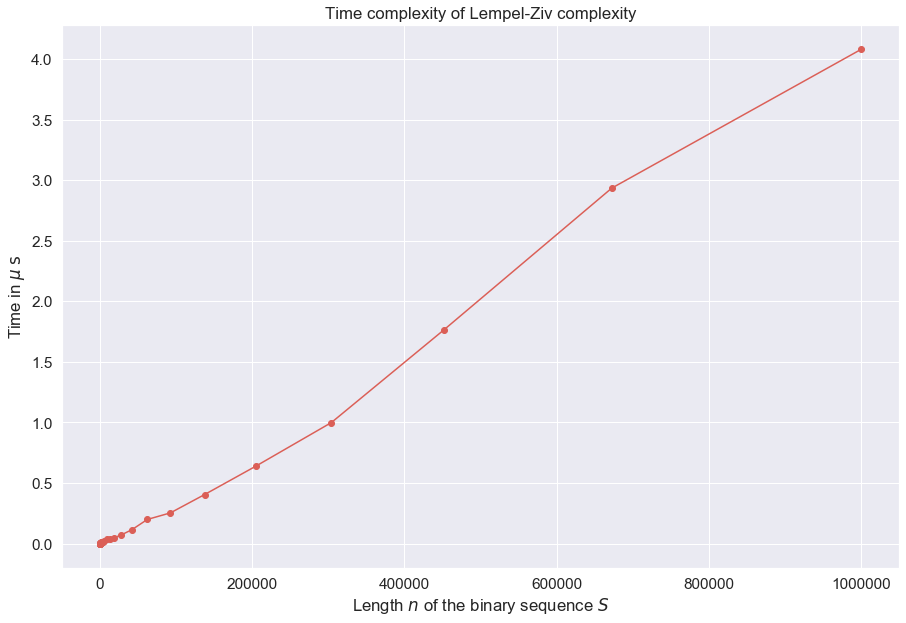

In [110]:
plt.figure(figsize=(15, 10))
plt.plot(sizes, times, 'o-')
plt.xlabel("Length $n$ of the binary sequence $S$")
plt.ylabel(r"Time in $\mu\;\mathrm{s}$")
plt.title("Time complexity of Lempel-Ziv complexity")
plt.show()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Length $n$ of the binary sequence $S$')

Text(0, 0.5, 'Time in $\\mu\\;\\mathrm{s}$')

Text(0.5, 1.0, 'Time complexity of Lempel-Ziv complexity, loglog scale')

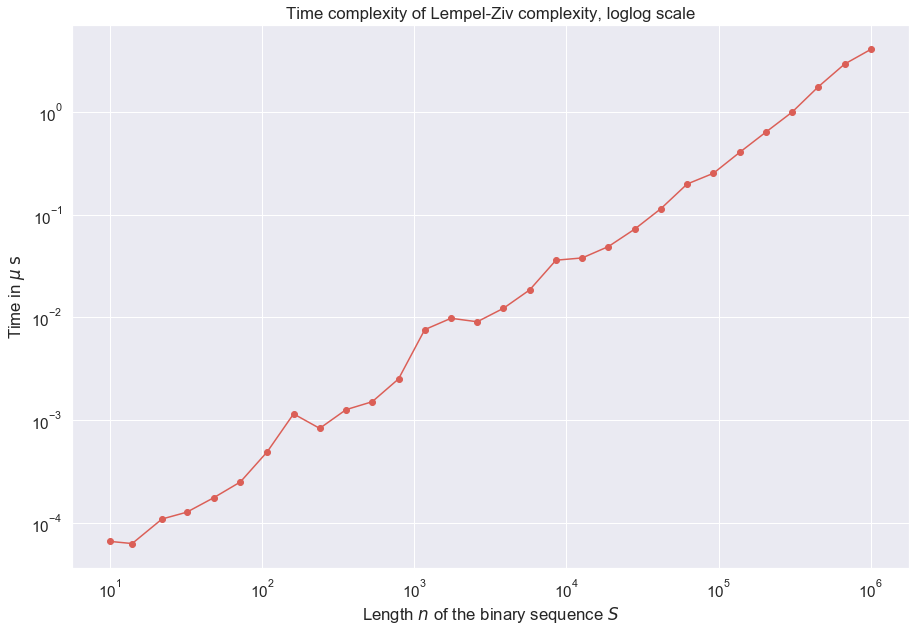

In [111]:
plt.figure(figsize=(15, 10))
plt.loglog(sizes, times, 'o-')
plt.xlabel("Length $n$ of the binary sequence $S$")
plt.ylabel(r"Time in $\mu\;\mathrm{s}$")
plt.title("Time complexity of Lempel-Ziv complexity, loglog scale")
plt.show()

It is linear in $\log\log$ scale, so indeed the algorithm seems to have a linear complexity.

To sum-up, for a sequence $S$ of length $n$, it takes $\mathcal{O}(n)$ basic operations to compute its Lempel-Ziv complexity $\mathrm{Lempel}-\mathrm{Ziv}(S)$.

----
## Conclusion

- The Lempel-Ziv complexity is not too hard to implement, and it indeed represents a certain complexity of a binary sequence, capturing the regularity and reproducibility of the sequence.

- Using the [Cython](http://Cython.org/) was quite useful to have a $\simeq \times 100$ speed up on our manual naive implementation !

- The algorithm is not easy to analyze, we have a trivial $\mathcal{O}(n^2)$ bound but experiments showed it is more likely to be $\mathcal{O}(n \log n)$ in the worst case, and $\mathcal{O}(n)$ in practice for "not too complicated sequences" (or in average, for random sequences).

----
## (Experimental) [Julia](http://julialang.org) implementation

I want to (quickly) try to see if I can use [Julia](http://julialang.org) to write a faster version of this function.
See [issue #1](https://github.com/Naereen/Lempel-Ziv_Complexity/issues/1).

In [118]:
%%time
%%script julia

"""Lempel-Ziv complexity for a sequence, in simple Julia code."""
function lempel_ziv_complexity(sequence)
    sub_strings = Set()
    n = length(sequence)

    ind = 1
    inc = 1
    while true
        if ind + inc > n
            break
        end
        sub_str = sequence[ind : ind + inc]
        if sub_str in sub_strings
            inc += 1
        else
            push!(sub_strings, sub_str)
            ind += inc
            inc = 1
        end
    end
    return length(sub_strings)
end

s = "1001111011000010"
lempel_ziv_complexity(s)  # 1 / 0 / 01 / 1110 / 1100 / 0010

M = 1000;
N = 10000;
for _ in 1:M
    s = join(rand(0:1, N));
    lempel_ziv_complexity(s);
end
lempel_ziv_complexity(s)  # 1 / 0 / 01 / 1110 / 1100 / 0010

"Lempel-Ziv complexity for a sequence, in simple Julia code."
lempel_ziv_complexity (generic function with 1 method)
"1001111011000010"
9
1000
10000
9
CPU times: user 6.89 ms, sys: 8 ms, total: 14.9 ms
Wall time: 3.85 s


And to compare it fairly, let us use [Pypy](http://pypy.org) for comparison.

In [122]:
%%time
%%pypy

def lempel_ziv_complexity(sequence):
    """Lempel-Ziv complexity for a binary sequence, in simple Python code."""
    sub_strings = set()
    n = len(sequence)

    ind = 0
    inc = 1
    while True:
        if ind + inc > len(sequence):
            break
        sub_str = sequence[ind : ind + inc]
        if sub_str in sub_strings:
            inc += 1
        else:
            sub_strings.add(sub_str)
            ind += inc
            inc = 1
    return len(sub_strings)

s = "1001111011000010"
lempel_ziv_complexity(s) # 1 / 0 / 01 / 11 / 10 / 110 / 00 / 010

from random import random

M = 1000
N = 10000
for _ in range(M):
    s = ''.join(str(int(random() < 0.5)) for _ in range(N))
    lempel_ziv_complexity(s)

CPU times: user 4.24 ms, sys: 8 ms, total: 12.2 ms
Wall time: 1.39 s


So we can check that on these 1000 random trials on strings of size 10000, the naive Julia version is slower than the naive Python version (executed by Pypy for speedup).

----
## Ending notes
> Thanks for reading!
> My implementation is [now open-source and available on GitHub](https://github.com/Naereen/Lempel-Ziv_Complexity), on https://github.com/Naereen/Lempel-Ziv_Complexity.

> It will be available from PyPi very soon, see https://pypi.python.org/pypi/lempel_ziv_complexity.

> See [this repo on GitHub](https://github.com/Naereen/notebooks/) for more notebooks, or [on nbviewer.jupyter.org](https://nbviewer.jupyter.org/github/Naereen/notebooks/).

> That's it for this demo! See you, folks!